In [1]:
import pandas as pd
pd.set_option("display.max_columns", None)


In [2]:
df=pd.read_csv('data/data9_selected_features.csv')
df['date']=pd.to_datetime(df['date'])

In [3]:
len(df)

2526

In [4]:
df.info(max_cols=200)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2526 entries, 0 to 2525
Data columns (total 88 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   date                                 2526 non-null   datetime64[ns]
 1   aqipm25                              2526 non-null   float64       
 2   dayofweek                            2526 non-null   int64         
 3   dayofyear                            2526 non-null   int64         
 4   weekofyear                           2526 non-null   int64         
 5   is_weekend                           2526 non-null   int64         
 6   month_sin                            2526 non-null   float64       
 7   month_cos                            2526 non-null   float64       
 8   doy_sin                              2526 non-null   float64       
 9   doy_cos                              2526 non-null   float64       
 10  aqi_lag_1   

In [5]:
# for i in df.columns:
#     print('-'*65)
#     print(df[i].value_counts())

# naive persistence baseline

In [6]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score

In [7]:
df = df.sort_values("date").reset_index(drop=True)


In [8]:
len(df)

2526

In [9]:
df["y_pred_naive"] = df["aqi_lag_1"]


In [10]:
test_df = df[df["year"] == 2025].copy()
len(test_df)

365

In [11]:
test_df = test_df.dropna(subset=["y_pred_naive"])
len(test_df)

365

In [12]:
y_true = test_df["aqipm25"]
y_pred_naive = test_df["y_pred_naive"]

rmse = root_mean_squared_error(y_true, y_pred_naive)
mae  = mean_absolute_error(y_true, y_pred_naive)
r2   = r2_score(y_true, y_pred_naive)

print("Naive baseline")
print("RMSE:", rmse)
print("MAE :", mae)
print("R2  :", r2)


Naive baseline
RMSE: 9.147703195005132
MAE : 5.972169374842658
R2  : 0.8782446996057884


In [13]:
df=df.drop(columns=['y_pred_naive'])

In [14]:
baseline_metrics = {
    "model": "Naive (AQI t-1)",
    "rmse": rmse,
    "mae": mae,
    "r2": r2
}


# data preparation

In [15]:
df=pd.read_csv('data/data9_selected_features.csv')
df['date']=pd.to_datetime(df['date'])

In [16]:
df.info(max_cols=200)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2526 entries, 0 to 2525
Data columns (total 88 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   date                                 2526 non-null   datetime64[ns]
 1   aqipm25                              2526 non-null   float64       
 2   dayofweek                            2526 non-null   int64         
 3   dayofyear                            2526 non-null   int64         
 4   weekofyear                           2526 non-null   int64         
 5   is_weekend                           2526 non-null   int64         
 6   month_sin                            2526 non-null   float64       
 7   month_cos                            2526 non-null   float64       
 8   doy_sin                              2526 non-null   float64       
 9   doy_cos                              2526 non-null   float64       
 10  aqi_lag_1   

In [17]:
df.head(1)

,date,aqipm25,dayofweek,dayofyear,weekofyear,is_weekend,month_sin,month_cos,doy_sin,doy_cos,aqi_lag_1,aqi_lag_3,aqi_lag_5,aqi_lag_7,aqi_lag_14,aqi_lag_21,aqi_lag_30,aqi_roll_std_3,aqi_roll_std_7,aqi_roll_std_14,aqi_roll_std_30,aqi_roll_min_7,dew_lag_1,windspeed_lag_1,windspeed_lag_3,windspeed_lag_7,winddir_lag_1,winddir_lag_3,winddir_lag_7,windgust_lag_1,windgust_lag_3,windgust_lag_7,precip_lag_1,precip_lag_3,precip_lag_7,precipcover_lag_1,precipcover_lag_3,precipcover_lag_7,cloudcover_lag_1,cloudcover_lag_3,cloudcover_lag_7,visibility_lag_3,visibility_lag_7,solarradiation_lag_1,solarenergy_lag_3,solarenergy_lag_7,preciptype_lag_1,preciptype_lag_3,preciptype_lag_7,icon_clear-day_lag_1,icon_clear-day_lag_3,icon_clear-day_lag_7,icon_partly-cloudy-day_lag_1,icon_partly-cloudy-day_lag_3,icon_partly-cloudy-day_lag_7,moonphase_lag_1,moonphase_lag_3,moonphase_lag_7,windspeed_roll_mean_3,windspeed_roll_mean_7,windspeed_roll_mean_14,winddir_roll_mean_14,windgust_roll_mean_3,windgust_roll_mean_14,precip_roll_mean_3,precip_roll_mean_7,precip_roll_mean_14,precipcover_roll_mean_3,precipcover_roll_mean_7,precipcover_roll_mean_14,icon_clear-day_roll_mean_3,icon_clear-day_roll_mean_7,icon_clear-day_roll_mean_14,icon_partly-cloudy-day_roll_mean_3,icon_partly-cloudy-day_roll_mean_7,icon_partly-cloudy-day_roll_mean_14,moonphase_roll_mean_7,moonphase_roll_mean_14,wind_dispersion_index,stagnation_index,day,aqi_hist_prev_day_avg,aqi_hist_same_day_avg,aqi_hist_next_day_avg,is_holiday,is_pre_holiday,is_post_holiday,year
0,2017-01-01,95.0,6,1,52,1,0.5,0.866025,0.017213,0.999852,127.0,103.0,107.0,129.0,108.0,118.0,86.0,15.874508,18.310809,16.336604,20.129466,81.0,11.9,14.7,16.1,12.6,88.4,90.9,106.0,33.1,30.6,20.5,0.0,0.0,0.0,0.0,0.0,0.0,8.9,4.8,21.2,5.6,4.4,252.9,21.7,21.2,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.07,0.0,0.87,16.3,15.6,15.035714,73.421429,32.033333,29.642857,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.857143,0.714286,0.0,0.142857,0.285714,0.538571,0.639286,79.38,64.770701,1,127.0,107.0,107.0,0,0,0,2017


In [18]:
df.tail(1)

,date,aqipm25,dayofweek,dayofyear,weekofyear,is_weekend,month_sin,month_cos,doy_sin,doy_cos,aqi_lag_1,aqi_lag_3,aqi_lag_5,aqi_lag_7,aqi_lag_14,aqi_lag_21,aqi_lag_30,aqi_roll_std_3,aqi_roll_std_7,aqi_roll_std_14,aqi_roll_std_30,aqi_roll_min_7,dew_lag_1,windspeed_lag_1,windspeed_lag_3,windspeed_lag_7,winddir_lag_1,winddir_lag_3,winddir_lag_7,windgust_lag_1,windgust_lag_3,windgust_lag_7,precip_lag_1,precip_lag_3,precip_lag_7,precipcover_lag_1,precipcover_lag_3,precipcover_lag_7,cloudcover_lag_1,cloudcover_lag_3,cloudcover_lag_7,visibility_lag_3,visibility_lag_7,solarradiation_lag_1,solarenergy_lag_3,solarenergy_lag_7,preciptype_lag_1,preciptype_lag_3,preciptype_lag_7,icon_clear-day_lag_1,icon_clear-day_lag_3,icon_clear-day_lag_7,icon_partly-cloudy-day_lag_1,icon_partly-cloudy-day_lag_3,icon_partly-cloudy-day_lag_7,moonphase_lag_1,moonphase_lag_3,moonphase_lag_7,windspeed_roll_mean_3,windspeed_roll_mean_7,windspeed_roll_mean_14,winddir_roll_mean_14,windgust_roll_mean_3,windgust_roll_mean_14,precip_roll_mean_3,precip_roll_mean_7,precip_roll_mean_14,precipcover_roll_mean_3,precipcover_roll_mean_7,precipcover_roll_mean_14,icon_clear-day_roll_mean_3,icon_clear-day_roll_mean_7,icon_clear-day_roll_mean_14,icon_partly-cloudy-day_roll_mean_3,icon_partly-cloudy-day_roll_mean_7,icon_partly-cloudy-day_roll_mean_14,moonphase_roll_mean_7,moonphase_roll_mean_14,wind_dispersion_index,stagnation_index,day,aqi_hist_prev_day_avg,aqi_hist_same_day_avg,aqi_hist_next_day_avg,is_holiday,is_pre_holiday,is_post_holiday,year
2525,2025-12-31,103.864056,2,365,1,0,-2.449294e-16,1.0,6.432491e-16,1.0,153.0,153.0,142.0,147.0,127.0,145.0,133.0,0.0,8.693183,8.726617,9.869784,129.0,16.0,14.7,16.5,16.3,92.4,83.7,79.1,18.4,23.0,23.8,0.0,0.0,0.0,0.0,0.0,0.0,42.9,38.5,44.1,3.9,4.3,240.3,21.0,20.8,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.36,0.25,0.15,15.866667,16.214286,17.142857,80.478571,22.066667,27.442857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.247143,0.341429,55.86,64.770701,31,101.041586,104.797457,93.714286,0,0,0,2025


In [19]:
len(df)

2526

In [20]:
df=df.drop(columns=['day','dayofweek'])

In [21]:
TARGET = "aqipm25"
DROP_COLS = ["aqipm25", "date","year"]

X = df.drop(columns=DROP_COLS)
y = df[TARGET]

X_train = X[df["year"] < 2025]
y_train = y[df["year"] < 2025]

X_test  = X[df["year"] == 2025]
y_test  = y[df["year"] == 2025]


In [22]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((2161, 83), (2161,), (365, 83), (365,))

In [23]:
X_train.columns

Index(['dayofyear', 'weekofyear', 'is_weekend', 'month_sin', 'month_cos',
       'doy_sin', 'doy_cos', 'aqi_lag_1', 'aqi_lag_3', 'aqi_lag_5',
       'aqi_lag_7', 'aqi_lag_14', 'aqi_lag_21', 'aqi_lag_30', 'aqi_roll_std_3',
       'aqi_roll_std_7', 'aqi_roll_std_14', 'aqi_roll_std_30',
       'aqi_roll_min_7', 'dew_lag_1', 'windspeed_lag_1', 'windspeed_lag_3',
       'windspeed_lag_7', 'winddir_lag_1', 'winddir_lag_3', 'winddir_lag_7',
       'windgust_lag_1', 'windgust_lag_3', 'windgust_lag_7', 'precip_lag_1',
       'precip_lag_3', 'precip_lag_7', 'precipcover_lag_1',
       'precipcover_lag_3', 'precipcover_lag_7', 'cloudcover_lag_1',
       'cloudcover_lag_3', 'cloudcover_lag_7', 'visibility_lag_3',
       'visibility_lag_7', 'solarradiation_lag_1', 'solarenergy_lag_3',
       'solarenergy_lag_7', 'preciptype_lag_1', 'preciptype_lag_3',
       'preciptype_lag_7', 'icon_clear-day_lag_1', 'icon_clear-day_lag_3',
       'icon_clear-day_lag_7', 'icon_partly-cloudy-day_lag_1',
       'ico

# plain models

In [24]:
import numpy as np
import pandas as pd

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score

from sklearn.linear_model import (
    LinearRegression, Ridge, Lasso, ElasticNet
)

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (
    RandomForestRegressor,
    ExtraTreesRegressor,
    GradientBoostingRegressor,
    AdaBoostRegressor
)

from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor


In [25]:
models = {

    # ---------- Linear ----------
    "Linear": Pipeline([
        ("scaler", StandardScaler()),
        ("model", LinearRegression())
    ]),

    "Ridge": Pipeline([
        ("scaler", StandardScaler()),
        ("model", Ridge(alpha=1.0))
    ]),

    "Lasso": Pipeline([
        ("scaler", StandardScaler()),
        ("model", Lasso(alpha=0.001))
    ]),

    "ElasticNet": Pipeline([
        ("scaler", StandardScaler()),
        ("model", ElasticNet(alpha=0.001, l1_ratio=0.5))
    ]),

    # ---------- Tree ----------
    "DecisionTree": Pipeline([
        ("scaler", StandardScaler()),
        ("model", DecisionTreeRegressor(max_depth=10, random_state=42))
    ]),

    "RandomForest": Pipeline([
        ("scaler", StandardScaler()),
        ("model", RandomForestRegressor(
            n_estimators=300,
            max_depth=12,
            n_jobs=-1,
            random_state=42
        ))
    ]),

    "ExtraTrees": Pipeline([
        ("scaler", StandardScaler()),
        ("model", ExtraTreesRegressor(
            n_estimators=300,
            max_depth=12,
            n_jobs=-1,
            random_state=42
        ))
    ]),

    # ---------- Boosting ----------
    "GradientBoosting": Pipeline([
        ("scaler", StandardScaler()),
        ("model", GradientBoostingRegressor(
            n_estimators=400,
            learning_rate=0.05,
            max_depth=5,
            random_state=42
        ))
    ]),

    "AdaBoost": Pipeline([
        ("scaler", StandardScaler()),
        ("model", AdaBoostRegressor(
            n_estimators=300,
            learning_rate=0.05,
            random_state=42
        ))
    ]),

    "XGBoost": Pipeline([
        ("scaler", StandardScaler()),
        ("model", XGBRegressor(
            n_estimators=600,
            learning_rate=0.03,
            max_depth=6,
            subsample=0.8,
            colsample_bytree=0.8,
            objective="reg:squarederror",
            n_jobs=-1,
            random_state=42
        ))
    ]),

    "LightGBM": Pipeline([
        ("scaler", StandardScaler()),
        ("model", LGBMRegressor(
            n_estimators=600,
            learning_rate=0.03,
            max_depth=-1,
            subsample=0.8,
            colsample_bytree=0.8,
            random_state=42
        ))
    ]),

    "CatBoost": Pipeline([
        ("scaler", StandardScaler()),
        ("model", CatBoostRegressor(
            iterations=600,
            learning_rate=0.03,
            depth=6,
            loss_function="RMSE",
            verbose=0,
            random_seed=42
        ))
    ]),

    # ---------- Distance / Kernel ----------
    "KNN": Pipeline([
        ("scaler", StandardScaler()),
        ("model", KNeighborsRegressor(n_neighbors=7, weights="distance"))
    ]),

    "SVR": Pipeline([
        ("scaler", StandardScaler()),
        ("model", SVR(
            kernel="rbf",
            C=10,
            epsilon=0.1
        ))
    ])
}


In [26]:
results = []

for name, model in models.items():
    print(f"Training {name}...")
    
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    rmse = root_mean_squared_error(y_test, preds)
    mae  = mean_absolute_error(y_test, preds)
    r2   = r2_score(y_test, preds)

    results.append({
        "model": name,
        "rmse": rmse,
        "mae": mae,
        "r2": r2
    })


Training Linear...
Training Ridge...
Training Lasso...
Training ElasticNet...
Training DecisionTree...
Training RandomForest...
Training ExtraTrees...
Training GradientBoosting...
Training AdaBoost...
Training XGBoost...
Training LightGBM...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001404 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12849
[LightGBM] [Info] Number of data points in the train set: 2161, number of used features: 83
[LightGBM] [Info] Start training from score 87.825798


c:\Users\Vinay S\Desktop\vins_tech\D1_project\ds_f_4_Next-Day AQI Prediction System for Bengaluru_m\ds_f_4\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Training CatBoost...
Training KNN...
Training SVR...


In [27]:
results_df_1 = pd.DataFrame(results)

baseline_df = pd.DataFrame([baseline_metrics])

results_df_1 = pd.concat(
    [results_df_1, baseline_df],
    ignore_index=True
).sort_values("r2",ascending=False)

results_df_1 = results_df_1.reset_index(drop=True)

In [28]:
results_df_1

,model,rmse,mae,r2
0,Naive (AQI t-1),9.147703,5.972169,0.878245
1,CatBoost,9.303685,6.606903,0.874057
2,GradientBoosting,9.321866,6.616709,0.873564
3,XGBoost,9.941696,6.979434,0.856191
4,ExtraTrees,9.973443,6.841695,0.855272
5,RandomForest,10.160507,6.712253,0.849792
6,LightGBM,10.189569,7.255909,0.848931
7,ElasticNet,10.414208,7.660163,0.842197
8,Lasso,10.415818,7.659490,0.842148
9,Ridge,10.417560,7.662810,0.842095


# optuna

In [29]:
import optuna

c:\Users\Vinay S\Desktop\vins_tech\D1_project\ds_f_4_Next-Day AQI Prediction System for Bengaluru_m\ds_f_4\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [30]:
# lasso
def objective_lasso(trial):

    model = Pipeline([
        ("scaler", StandardScaler()),
        ("lasso", Lasso(
            alpha=trial.suggest_float("alpha", 0.001, 10.0, log=True),
            random_state=42,
            max_iter=5000
        ))
    ])

    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    return root_mean_squared_error(y_test, preds)


study_lasso = optuna.create_study(direction="minimize")
study_lasso.optimize(objective_lasso, n_trials=20, n_jobs=1)

best_lasso = Pipeline([
    ("scaler", StandardScaler()),
    ("lasso", Lasso(
        alpha=study_lasso.best_params["alpha"],
        random_state=42,
        max_iter=5000
    ))
])

best_lasso.fit(X_train, y_train)


[I 2026-01-12 23:26:14,105] A new study created in memory with name: no-name-7f5137f0-60ca-44c0-97eb-7416fd11299f
[I 2026-01-12 23:26:14,121] Trial 0 finished with value: 9.951058497141736 and parameters: {'alpha': 0.23825097454885927}. Best is trial 0 with value: 9.951058497141736.
[I 2026-01-12 23:26:14,168] Trial 1 finished with value: 10.414944863511854 and parameters: {'alpha': 0.0011444101668070961}. Best is trial 0 with value: 9.951058497141736.
[I 2026-01-12 23:26:14,179] Trial 2 finished with value: 13.923913936379167 and parameters: {'alpha': 7.5156926320891735}. Best is trial 0 with value: 9.951058497141736.
[I 2026-01-12 23:26:14,189] Trial 3 finished with value: 10.090117656184956 and parameters: {'alpha': 1.120873669543329}. Best is trial 0 with value: 9.951058497141736.
[I 2026-01-12 23:26:14,234] Trial 4 finished with value: 10.411872662272222 and parameters: {'alpha': 0.0016587964738223298}. Best is trial 0 with value: 9.951058497141736.
[I 2026-01-12 23:26:14,246] Tri

,steps,"[('scaler', ...), ('lasso', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,alpha,0.36074290555759597
,fit_intercept,True
,precompute,False
,copy_X,True


In [31]:
# ridge
def objective_ridge(trial):

    model = Pipeline([
        ("scaler", StandardScaler()),
        ("ridge", Ridge(
            alpha=trial.suggest_float("alpha", 0.1, 100.0, log=True),
            random_state=42
        ))
    ])

    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    return root_mean_squared_error(y_test, preds)


study_ridge = optuna.create_study(direction="minimize")
study_ridge.optimize(objective_ridge, n_trials=20, n_jobs=1)

best_ridge = Pipeline([
    ("scaler", StandardScaler()),
    ("ridge", Ridge(
        alpha=study_ridge.best_params["alpha"],
        random_state=42
    ))
])

best_ridge.fit(X_train, y_train)


[I 2026-01-12 23:26:14,578] A new study created in memory with name: no-name-7518e9ab-be97-4381-96e3-bb849e9a101d
[I 2026-01-12 23:26:14,591] Trial 0 finished with value: 10.361702118878792 and parameters: {'alpha': 43.76471423829558}. Best is trial 0 with value: 10.361702118878792.
[I 2026-01-12 23:26:14,601] Trial 1 finished with value: 10.378479868690956 and parameters: {'alpha': 15.035369852429262}. Best is trial 0 with value: 10.361702118878792.
[I 2026-01-12 23:26:14,611] Trial 2 finished with value: 10.41838150926808 and parameters: {'alpha': 0.8091413720700754}. Best is trial 0 with value: 10.361702118878792.
[I 2026-01-12 23:26:14,621] Trial 3 finished with value: 10.369735296795902 and parameters: {'alpha': 61.82795465335857}. Best is trial 0 with value: 10.361702118878792.
[I 2026-01-12 23:26:14,632] Trial 4 finished with value: 10.402597111078721 and parameters: {'alpha': 4.992541250722073}. Best is trial 0 with value: 10.361702118878792.
[I 2026-01-12 23:26:14,643] Trial 5

,steps,"[('scaler', ...), ('ridge', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,alpha,36.98814094664422
,fit_intercept,True
,copy_X,True
,max_iter,None


In [32]:
# elasticnet
def objective_elastic(trial):

    model = Pipeline([
        ("scaler", StandardScaler()),
        ("elastic", ElasticNet(
            alpha=trial.suggest_float("alpha", 0.01, 100.0, log=True),
            l1_ratio=trial.suggest_float("l1_ratio", 0.1, 0.9),
            random_state=42,
            max_iter=5000
        ))
    ])

    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    return root_mean_squared_error(y_test, preds)


study_elastic = optuna.create_study(direction="minimize")
study_elastic.optimize(objective_elastic, n_trials=20, n_jobs=1)

best_elastic = Pipeline([
    ("scaler", StandardScaler()),
    ("elastic", ElasticNet(
        alpha=study_elastic.best_params["alpha"],
        l1_ratio=study_elastic.best_params["l1_ratio"],
        random_state=42,
        max_iter=5000
    ))
])

best_elastic.fit(X_train, y_train)


[I 2026-01-12 23:26:14,827] A new study created in memory with name: no-name-623d4647-fdeb-4467-adb5-67718d32555d
[I 2026-01-12 23:26:14,838] Trial 0 finished with value: 12.446421889529274 and parameters: {'alpha': 1.9099308740314633, 'l1_ratio': 0.7218400547940932}. Best is trial 0 with value: 12.446421889529274.
[I 2026-01-12 23:26:14,849] Trial 1 finished with value: 20.094027516879578 and parameters: {'alpha': 10.799970668169895, 'l1_ratio': 0.2829673338602603}. Best is trial 0 with value: 12.446421889529274.
[I 2026-01-12 23:26:14,883] Trial 2 finished with value: 10.330735906917871 and parameters: {'alpha': 0.015921942603830355, 'l1_ratio': 0.8263153215384109}. Best is trial 2 with value: 10.330735906917871.
[I 2026-01-12 23:26:14,910] Trial 3 finished with value: 10.450538543285392 and parameters: {'alpha': 0.09495327490963613, 'l1_ratio': 0.24130878159028218}. Best is trial 2 with value: 10.330735906917871.
[I 2026-01-12 23:26:14,919] Trial 4 finished with value: 27.1427805272

,steps,"[('scaler', ...), ('elastic', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,alpha,0.0383822467328225
,l1_ratio,0.7940051390030658
,fit_intercept,True
,precompute,False


In [33]:
# svr
def objective_svr(trial):

    model = Pipeline([
        ("scaler", StandardScaler()),
        ("svr", SVR(
            C=trial.suggest_float("C", 1.0, 50.0, log=True),
            epsilon=trial.suggest_float("epsilon", 0.01, 1.0, log=True),
            kernel=trial.suggest_categorical("kernel", ["rbf", "poly"]),
            gamma=trial.suggest_categorical("gamma", ["scale", "auto"])
        ))
    ])

    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    return root_mean_squared_error(y_test, preds)

study_svr = optuna.create_study(direction="minimize")
study_svr.optimize(objective_svr, n_trials=20, n_jobs=1)

best_svr = Pipeline([
    ("scaler", StandardScaler()),
    ("svr", SVR(**study_svr.best_params))
])

best_svr.fit(X_train, y_train)


[I 2026-01-12 23:26:15,313] A new study created in memory with name: no-name-e77a72d0-7b4a-4611-932e-34f80b5b5766
[I 2026-01-12 23:26:15,613] Trial 0 finished with value: 14.06313081418827 and parameters: {'C': 44.886606064913934, 'epsilon': 0.4780923689279807, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 0 with value: 14.06313081418827.
[I 2026-01-12 23:26:15,771] Trial 1 finished with value: 18.047255237685697 and parameters: {'C': 1.6293538409542792, 'epsilon': 0.0869733175773211, 'kernel': 'poly', 'gamma': 'scale'}. Best is trial 0 with value: 14.06313081418827.
[I 2026-01-12 23:26:15,950] Trial 2 finished with value: 15.851793117183474 and parameters: {'C': 9.295584859029999, 'epsilon': 0.603521985413071, 'kernel': 'poly', 'gamma': 'scale'}. Best is trial 0 with value: 14.06313081418827.
[I 2026-01-12 23:26:16,111] Trial 3 finished with value: 17.060665651056567 and parameters: {'C': 3.960643365793331, 'epsilon': 0.017882183887001402, 'kernel': 'poly', 'gamma': 'auto'}. Best i

,steps,"[('scaler', ...), ('svr', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0


In [34]:
# extra tree
def objective_et(trial):

    model = ExtraTreesRegressor(
        n_estimators=trial.suggest_int("n_estimators", 300, 800),
        max_depth=trial.suggest_int("max_depth", 10, 40),
        min_samples_split=trial.suggest_int("min_samples_split", 2, 10),
        min_samples_leaf=trial.suggest_int("min_samples_leaf", 1, 5),
        max_features=trial.suggest_categorical("max_features", ["sqrt", "log2"]),
        random_state=42,
        n_jobs=1
    )

    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    return root_mean_squared_error(y_test, preds)


study_et = optuna.create_study(direction="minimize")
study_et.optimize(objective_et, n_trials=20, n_jobs=1)

best_et = ExtraTreesRegressor(
    **study_et.best_params,
    random_state=42,
    n_jobs=1
)

best_et.fit(X_train, y_train)


[I 2026-01-12 23:26:19,922] A new study created in memory with name: no-name-951780ad-84c0-4dba-a9de-727f4433f9e9
[I 2026-01-12 23:26:21,524] Trial 0 finished with value: 14.574585860729641 and parameters: {'n_estimators': 540, 'max_depth': 33, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 0 with value: 14.574585860729641.
[I 2026-01-12 23:26:22,494] Trial 1 finished with value: 14.13272974215 and parameters: {'n_estimators': 446, 'max_depth': 17, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 1 with value: 14.13272974215.
[I 2026-01-12 23:26:23,617] Trial 2 finished with value: 14.783766890138601 and parameters: {'n_estimators': 547, 'max_depth': 17, 'min_samples_split': 9, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 1 with value: 14.13272974215.
[I 2026-01-12 23:26:24,620] Trial 3 finished with value: 14.107095362455102 and parameters: {'n_estimators': 464, 'max_depth': 36, 'min_samples_

,n_estimators,693
,criterion,'squared_error'
,max_depth,40
,min_samples_split,6
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,False
,oob_score,False


In [35]:
# random forest
def objective_rf(trial):

    model = RandomForestRegressor(
        n_estimators=trial.suggest_int("n_estimators", 300, 700),
        max_depth=trial.suggest_int("max_depth", 10, 35),
        min_samples_split=trial.suggest_int("min_samples_split", 2, 10),
        min_samples_leaf=trial.suggest_int("min_samples_leaf", 1, 5),
        max_features=trial.suggest_categorical("max_features", ["sqrt", "log2"]),
        random_state=42,
        n_jobs=1
    )

    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    return root_mean_squared_error(y_test, preds)


study_rf = optuna.create_study(direction="minimize")
study_rf.optimize(objective_rf, n_trials=20, n_jobs=1)

best_rf = RandomForestRegressor(
    **study_rf.best_params,
    random_state=42,
    n_jobs=1
)

best_rf.fit(X_train, y_train)


[I 2026-01-12 23:26:51,647] A new study created in memory with name: no-name-13dabe32-dec6-4d52-ad60-76ee5267ef15
[I 2026-01-12 23:26:54,612] Trial 0 finished with value: 10.944448937930902 and parameters: {'n_estimators': 348, 'max_depth': 34, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 0 with value: 10.944448937930902.
[I 2026-01-12 23:26:59,516] Trial 1 finished with value: 10.91304458945617 and parameters: {'n_estimators': 691, 'max_depth': 25, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 1 with value: 10.91304458945617.
[I 2026-01-12 23:27:02,091] Trial 2 finished with value: 10.833185029572375 and parameters: {'n_estimators': 377, 'max_depth': 32, 'min_samples_split': 8, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 2 with value: 10.833185029572375.
[I 2026-01-12 23:27:06,609] Trial 3 finished with value: 10.895720242120849 and parameters: {'n_estimators': 599, 'max_depth': 18, 'mi

,n_estimators,363
,criterion,'squared_error'
,max_depth,31
,min_samples_split,10
,min_samples_leaf,3
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [36]:
# catboost
def objective_cb(trial):

    model = CatBoostRegressor(
        iterations=trial.suggest_int("iterations", 500, 1200),
        depth=trial.suggest_int("depth", 4, 8),
        learning_rate=trial.suggest_float("learning_rate", 0.03, 0.1),
        l2_leaf_reg=trial.suggest_float("l2_leaf_reg", 1.0, 5.0),
        loss_function="RMSE",
        random_seed=42,
        verbose=0
    )

    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    return root_mean_squared_error(y_test, preds)


study_cb = optuna.create_study(direction="minimize")
study_cb.optimize(objective_cb, n_trials=20, n_jobs=1)

best_cb = CatBoostRegressor(
    **study_cb.best_params,
    loss_function="RMSE",
    random_seed=42,
    verbose=0
)

best_cb.fit(X_train, y_train)


[I 2026-01-12 23:27:55,154] A new study created in memory with name: no-name-6ef1d77f-70fa-4525-aa74-bbd09173928a
[I 2026-01-12 23:27:58,289] Trial 0 finished with value: 10.136559232890155 and parameters: {'iterations': 648, 'depth': 7, 'learning_rate': 0.09975629752816917, 'l2_leaf_reg': 2.9990124623137526}. Best is trial 0 with value: 10.136559232890155.
[I 2026-01-12 23:27:59,575] Trial 1 finished with value: 9.66766625024139 and parameters: {'iterations': 908, 'depth': 4, 'learning_rate': 0.04716245929338708, 'l2_leaf_reg': 1.060119754056628}. Best is trial 1 with value: 9.66766625024139.
[I 2026-01-12 23:28:01,305] Trial 2 finished with value: 9.5965480251207 and parameters: {'iterations': 858, 'depth': 5, 'learning_rate': 0.05249453869186889, 'l2_leaf_reg': 2.201211073619715}. Best is trial 2 with value: 9.5965480251207.
[I 2026-01-12 23:28:07,165] Trial 3 finished with value: 10.297107111105904 and parameters: {'iterations': 1188, 'depth': 7, 'learning_rate': 0.0900433396275206

In [37]:
# adaboost
def objective_ada(trial):

    base_estimator = DecisionTreeRegressor(
        max_depth=trial.suggest_int("max_depth", 2, 6),
        min_samples_split=trial.suggest_int("min_samples_split", 2, 10),
        random_state=42
    )

    model = AdaBoostRegressor(
        estimator=base_estimator,
        n_estimators=trial.suggest_int("n_estimators", 200, 600),
        learning_rate=trial.suggest_float("learning_rate", 0.03, 0.3),
        random_state=42
    )

    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    return root_mean_squared_error(y_test, preds)


study_ada = optuna.create_study(direction="minimize")
study_ada.optimize(objective_ada, n_trials=20, n_jobs=1)

best_ada = AdaBoostRegressor(
    estimator=DecisionTreeRegressor(
        max_depth=study_ada.best_params["max_depth"],
        min_samples_split=study_ada.best_params["min_samples_split"],
        random_state=42
    ),
    n_estimators=study_ada.best_params["n_estimators"],
    learning_rate=study_ada.best_params["learning_rate"],
    random_state=42
)

best_ada.fit(X_train, y_train)


[I 2026-01-12 23:28:46,621] A new study created in memory with name: no-name-6b454aad-96af-4526-bc1a-6e759403fad1
[I 2026-01-12 23:28:49,130] Trial 0 finished with value: 24.413596521021393 and parameters: {'max_depth': 2, 'min_samples_split': 10, 'n_estimators': 215, 'learning_rate': 0.11642540449921603}. Best is trial 0 with value: 24.413596521021393.
[I 2026-01-12 23:28:51,632] Trial 1 finished with value: 20.50881181125171 and parameters: {'max_depth': 2, 'min_samples_split': 7, 'n_estimators': 207, 'learning_rate': 0.0968373468669175}. Best is trial 1 with value: 20.50881181125171.
[I 2026-01-12 23:28:54,202] Trial 2 finished with value: 26.738190589766578 and parameters: {'max_depth': 2, 'min_samples_split': 4, 'n_estimators': 251, 'learning_rate': 0.1493359951484239}. Best is trial 1 with value: 20.50881181125171.
[I 2026-01-12 23:29:03,150] Trial 3 finished with value: 10.95442025262773 and parameters: {'max_depth': 5, 'min_samples_split': 6, 'n_estimators': 384, 'learning_rate

,estimator,DecisionTreeR...ndom_state=42)
,n_estimators,476
,learning_rate,0.03084078851102262
,loss,'linear'
,random_state,42
,criterion,'squared_error'
,splitter,'best'
,max_depth,6
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0


In [38]:
# grad boost
def objective_gb(trial):

    model = GradientBoostingRegressor(
        n_estimators=trial.suggest_int("n_estimators", 200, 500),
        max_depth=trial.suggest_int("max_depth", 2, 5),
        learning_rate=trial.suggest_float("learning_rate", 0.03, 0.1),
        subsample=trial.suggest_float("subsample", 0.7, 1.0),
        random_state=42
    )

    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    return root_mean_squared_error(y_test, preds)


study_gb = optuna.create_study(direction="minimize")
study_gb.optimize(objective_gb, n_trials=20, n_jobs=1)

best_gb = GradientBoostingRegressor(
    **study_gb.best_params,
    random_state=42
)

best_gb.fit(X_train, y_train)


[I 2026-01-12 23:32:40,641] A new study created in memory with name: no-name-0810cb2c-c112-459c-9805-2fedccea06f4
[I 2026-01-12 23:32:45,130] Trial 0 finished with value: 10.407194884447003 and parameters: {'n_estimators': 287, 'max_depth': 2, 'learning_rate': 0.059323929621967864, 'subsample': 0.933339945770967}. Best is trial 0 with value: 10.407194884447003.
[I 2026-01-12 23:32:58,060] Trial 1 finished with value: 10.169911324248686 and parameters: {'n_estimators': 361, 'max_depth': 5, 'learning_rate': 0.05692110208297009, 'subsample': 0.8556628575712228}. Best is trial 1 with value: 10.169911324248686.
[I 2026-01-12 23:33:08,861] Trial 2 finished with value: 10.1453648213587 and parameters: {'n_estimators': 275, 'max_depth': 5, 'learning_rate': 0.08497785088586511, 'subsample': 0.9534923868352919}. Best is trial 2 with value: 10.1453648213587.
[I 2026-01-12 23:33:14,107] Trial 3 finished with value: 10.75459051104607 and parameters: {'n_estimators': 408, 'max_depth': 2, 'learning_r

,loss,'squared_error'
,learning_rate,0.031294802478299216
,n_estimators,275
,subsample,0.7627364780221395
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,4
,min_impurity_decrease,0.0
,init,None


In [39]:
# xgb
def objective_xgb(trial):

    model = XGBRegressor(
        n_estimators=trial.suggest_int("n_estimators", 300, 600),
        max_depth=trial.suggest_int("max_depth", 3, 7),
        learning_rate=trial.suggest_float("learning_rate", 0.03, 0.1),
        subsample=trial.suggest_float("subsample", 0.8, 1.0),
        colsample_bytree=trial.suggest_float("colsample_bytree", 0.7, 1.0),
        reg_alpha=trial.suggest_float("reg_alpha", 0.0, 0.3),
        reg_lambda=trial.suggest_float("reg_lambda", 1.0, 5.0),
        objective="reg:squarederror",
        random_state=42,
        n_jobs=1
    )

    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    return root_mean_squared_error(y_test, preds)


study_xgb = optuna.create_study(direction="minimize")
study_xgb.optimize(objective_xgb, n_trials=20, n_jobs=1)

best_xgb = XGBRegressor(
    **study_xgb.best_params,
    objective="reg:squarederror",
    random_state=42,
    n_jobs=1
)

best_xgb.fit(X_train, y_train)


[I 2026-01-12 23:35:12,509] A new study created in memory with name: no-name-19eb1fb9-614d-4599-92f9-3c6a6f7ecb9c
[I 2026-01-12 23:35:12,961] Trial 0 finished with value: 9.55497920656942 and parameters: {'n_estimators': 326, 'max_depth': 3, 'learning_rate': 0.035679286878507126, 'subsample': 0.913027561826894, 'colsample_bytree': 0.7480946299907112, 'reg_alpha': 0.1121878330147864, 'reg_lambda': 2.540078533495914}. Best is trial 0 with value: 9.55497920656942.
[I 2026-01-12 23:35:14,691] Trial 1 finished with value: 9.576876231146386 and parameters: {'n_estimators': 465, 'max_depth': 5, 'learning_rate': 0.03104153894148477, 'subsample': 0.8535014769961489, 'colsample_bytree': 0.8581254234230558, 'reg_alpha': 0.19982804418360714, 'reg_lambda': 4.7487445983301715}. Best is trial 0 with value: 9.55497920656942.
[I 2026-01-12 23:35:15,378] Trial 2 finished with value: 9.958589259834188 and parameters: {'n_estimators': 452, 'max_depth': 3, 'learning_rate': 0.05149261072298296, 'subsample':

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.7480946299907112
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [ ]:
# light gbm
def objective_lgbm(trial):

    model = LGBMRegressor(
        n_estimators=trial.suggest_int("n_estimators", 300, 800),
        max_depth=trial.suggest_int("max_depth", -1, 12),
        learning_rate=trial.suggest_float("learning_rate", 0.03, 0.1),
        num_leaves=trial.suggest_int("num_leaves", 31, 128),
        subsample=trial.suggest_float("subsample", 0.7, 1.0),
        colsample_bytree=trial.suggest_float("colsample_bytree", 0.7, 1.0),
        reg_alpha=trial.suggest_float("reg_alpha", 0.0, 0.3),
        reg_lambda=trial.suggest_float("reg_lambda", 1.0, 5.0),
        random_state=42,
        n_jobs=1
    )

    # Train on <= 2024
    model.fit(X_train, y_train)

    # Validate on 2025
    preds = model.predict(X_test)

    return root_mean_squared_error(y_test, preds)

study_lgbm = optuna.create_study(direction="minimize")
study_lgbm.optimize(objective_lgbm, n_trials=20, n_jobs=1)

best_lgbm = LGBMRegressor(
    **study_lgbm.best_params,
    random_state=42,
    n_jobs=1
)

best_lgbm.fit(X_train, y_train)


### eval

In [41]:
def evaluate(model, name):
    preds = model.predict(X_test)
    return {
        "model": name,
        "rmse": root_mean_squared_error(y_test, preds),
        "mae": np.mean(np.abs(y_test - preds)),
        "r2": r2_score(y_test, preds)
    }


In [42]:
results = []

In [43]:
results.append(evaluate(best_lasso,   "Lasso (Optuna)"))
results.append(evaluate(best_ridge, "Ridge Regression (Optuna)"))
results.append(evaluate(best_elastic, "ElasticNet (Optuna)"))
results.append(evaluate(best_svr, "SVR (Optuna)"))
results.append(evaluate(best_et,  "ExtraTrees (Optuna)"))
results.append(evaluate(best_rf,  "RandomForest (Optuna)"))
results.append(evaluate(best_cb,  "CatBoost (Optuna)"))
results.append(evaluate(best_ada,     "AdaBoost (Optuna)"))
results.append(evaluate(best_gb,  "GradientBoosting (Optuna)"))
results.append(evaluate(best_xgb, "XGBoost (Optuna)"))
results.append(evaluate(best_lgbm, "LightGBM (Optuna)"))

In [44]:
results_df_2 = pd.DataFrame(results)

baseline_df = pd.DataFrame([baseline_metrics])

results_df_2 = pd.concat(
    [results_df_2, baseline_df],
    ignore_index=True
).sort_values("r2",ascending=False)

results_df_2 = results_df_2.reset_index(drop=True)

In [45]:
results_df_2

,model,rmse,mae,r2
0,Naive (AQI t-1),9.147703,5.972169,0.878245
1,GradientBoosting (Optuna),9.158760,6.326060,0.877950
2,CatBoost (Optuna),9.217966,6.465399,0.876367
3,XGBoost (Optuna),9.554979,6.508178,0.867162
4,AdaBoost (Optuna),9.582395,6.977208,0.866398
5,LightGBM (Optuna),9.766584,6.700849,0.861213
6,Lasso (Optuna),9.912796,7.152229,0.857026
7,ElasticNet (Optuna),10.251119,7.539006,0.847100
8,Ridge Regression (Optuna),10.361445,7.638503,0.843792
9,RandomForest (Optuna),10.809498,7.804734,0.829990


# error analysis

In [48]:
best_model=best_gb

In [53]:
y_pred = best_model.predict(X_test)

residuals = y_test-y_pred
residuals_pct = (residuals / y_test) * 100

results_df = pd.DataFrame({
    'actual': y_test, 
    'predicted': y_pred, 
    'diff': residuals, 
    'diff_pct': residuals_pct
})

results_df['diff_pct_abs']=abs(results_df['diff_pct'])

residuals_naive = y_test-y_pred_naive
residuals_naive_pct = (residuals_naive / y_test) * 100

results_df['diff_naive']=residuals_naive
results_df['diff_naive_pct']=residuals_naive_pct
results_df['diff_naive_pct_abs']=abs(results_df['diff_naive_pct'])


results_df.head()

,actual,predicted,diff,diff_pct,diff_pct_abs,diff_naive,diff_naive_pct,diff_naive_pct_abs
2161,139.0,116.851355,22.148645,15.934277,15.934277,17.333333,12.470024,12.470024
2162,121.0,124.649116,-3.649116,-3.015798,3.015798,-18.000000,-14.876033,14.876033
2163,124.0,116.585328,7.414672,5.979574,5.979574,3.000000,2.419355,2.419355
2164,115.0,116.544434,-1.544434,-1.342986,1.342986,-9.000000,-7.826087,7.826087
2165,121.0,112.335977,8.664023,7.160349,7.160349,6.000000,4.958678,4.958678


In [59]:
results_df['diff_naive_pct_abs'].var()

np.float64(74.27563776930724)

In [60]:
results_df['diff_pct_abs'].var()

np.float64(67.77006030924152)

In [54]:
results_df.describe()[['diff_pct_abs','diff_naive_pct_abs']]

,diff_pct_abs,diff_naive_pct_abs
count,365.000000,365.000000
mean,8.196818,7.596386
std,8.232257,8.618331
min,0.020643,0.000000
25%,2.699087,1.694915
50%,5.618157,4.918033
75%,10.460714,10.126582
max,50.988151,59.666403


In [61]:
results_df['diff_pct_abs'].quantile(0.95)

np.float64(24.30111347329982)

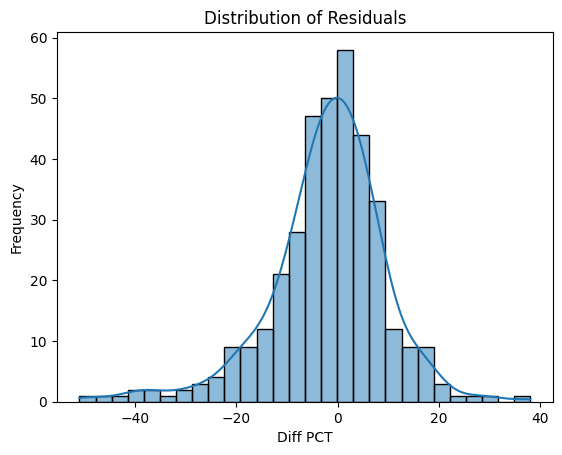

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(results_df['diff_pct'], kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Diff PCT')
plt.ylabel('Frequency')
plt.show()

In [63]:
extreme_error_threshold = 10  # You can adjust this threshold based on your domain knowledge or requirements
extreme_results_df = results_df[np.abs(results_df['diff_pct']) > extreme_error_threshold]
extreme_results_df.head()

,actual,predicted,diff,diff_pct,diff_pct_abs,diff_naive,diff_naive_pct,diff_naive_pct_abs
2161,139.0,116.851355,22.148645,15.934277,15.934277,17.333333,12.470024,12.470024
2166,143.0,117.198393,25.801607,18.043082,18.043082,22.000000,15.384615,15.384615
2167,118.0,138.629109,-20.629109,-17.482296,17.482296,-25.000000,-21.186441,21.186441
2168,80.0,120.790521,-40.790521,-50.988151,50.988151,-38.000000,-47.500000,47.500000
2169,96.0,81.564009,14.435991,15.037490,15.037490,16.000000,16.666667,16.666667


In [64]:
extreme_errors_pct = extreme_results_df.shape[0]*100/X_test.shape[0]
extreme_errors_pct

26.575342465753426

In [65]:
extreme_errors_df = X_test.loc[extreme_results_df.index]
extreme_errors_df.head(2)

,dayofyear,weekofyear,is_weekend,month_sin,month_cos,doy_sin,doy_cos,aqi_lag_1,aqi_lag_3,aqi_lag_5,aqi_lag_7,aqi_lag_14,aqi_lag_21,aqi_lag_30,aqi_roll_std_3,aqi_roll_std_7,aqi_roll_std_14,aqi_roll_std_30,aqi_roll_min_7,dew_lag_1,windspeed_lag_1,windspeed_lag_3,windspeed_lag_7,winddir_lag_1,winddir_lag_3,winddir_lag_7,windgust_lag_1,windgust_lag_3,windgust_lag_7,precip_lag_1,precip_lag_3,precip_lag_7,precipcover_lag_1,precipcover_lag_3,precipcover_lag_7,cloudcover_lag_1,cloudcover_lag_3,cloudcover_lag_7,visibility_lag_3,visibility_lag_7,solarradiation_lag_1,solarenergy_lag_3,solarenergy_lag_7,preciptype_lag_1,preciptype_lag_3,preciptype_lag_7,icon_clear-day_lag_1,icon_clear-day_lag_3,icon_clear-day_lag_7,icon_partly-cloudy-day_lag_1,icon_partly-cloudy-day_lag_3,icon_partly-cloudy-day_lag_7,moonphase_lag_1,moonphase_lag_3,moonphase_lag_7,windspeed_roll_mean_3,windspeed_roll_mean_7,windspeed_roll_mean_14,winddir_roll_mean_14,windgust_roll_mean_3,windgust_roll_mean_14,precip_roll_mean_3,precip_roll_mean_7,precip_roll_mean_14,precipcover_roll_mean_3,precipcover_roll_mean_7,precipcover_roll_mean_14,icon_clear-day_roll_mean_3,icon_clear-day_roll_mean_7,icon_clear-day_roll_mean_14,icon_partly-cloudy-day_roll_mean_3,icon_partly-cloudy-day_roll_mean_7,icon_partly-cloudy-day_roll_mean_14,moonphase_roll_mean_7,moonphase_roll_mean_14,wind_dispersion_index,stagnation_index,aqi_hist_prev_day_avg,aqi_hist_same_day_avg,aqi_hist_next_day_avg,is_holiday,is_pre_holiday,is_post_holiday
2161,1,1,0,0.5,0.866025,0.017213,0.999852,121.666667,87.0,75.0,94.000000,85.0,92.0,60.0,17.333333,17.436658,13.804783,16.864152,72.000000,16.6,20.7,22.0,14.6,78.6,67.9,22.5,38.5,26.3,23.0,0.0,0.0,0.3,0.0,0.0,12.50,34.2,41.7,56.3,5.0,4.8,240.4,20.6,11.7,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.00,0.95,0.82,20.400000,18.757143,15.207143,54.014286,34.333333,28.8,0.033333,0.100000,0.214286,1.39,3.572857,4.762143,0.0,0.0,0.0,0.666667,0.428571,0.500000,0.770000,0.730000,122.13,46.976959,104.797457,93.714286,87.285714,0,0,0
2166,6,2,0,0.5,0.866025,0.103102,0.994671,121.000000,124.0,139.0,104.333333,111.0,117.0,79.0,4.582576,10.384920,20.319848,17.470851,104.333333,15.5,16.5,22.2,18.5,87.1,69.8,69.4,24.1,36.7,38.2,0.0,0.0,0.1,0.0,0.0,4.17,28.1,35.0,54.9,4.6,5.5,245.5,21.3,13.5,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.19,0.12,0.98,17.833333,18.800000,17.442857,71.557143,30.833333,31.7,0.000000,0.014286,0.064286,0.00,0.595714,2.381429,0.0,0.0,0.0,1.000000,0.857143,0.642857,0.224286,0.537143,70.95,58.131429,116.123648,121.512727,121.344345,0,0,0


In [ ]:
extreme_errors_df['month'].value_counts().sort_index()

# save models


In [49]:
import joblib

In [50]:
joblib.dump(best_cb, "artifacts/selected_features_catboost.joblib")

['artifacts/selected_features_catboost.joblib']

In [51]:
joblib.dump(best_gb, "artifacts/selected_features_gradboost.joblib")

['artifacts/selected_features_gradboost.joblib']

In [52]:
feature_columns = X_test.columns.tolist()
joblib.dump(feature_columns, "artifacts/selected_features.joblib")

['artifacts/selected_features.joblib']